# Introduction to BN learn

In this notebook I work through the absolute basics of BN learn, from several different BN learn tutorials I have come across. The notebook makes use of example datasets provided with the BN learn package.

Author: Leah JB

In [47]:
# Install packages (these are already installed on NIVA's JupyterHub)
# install.packages("bnlearn")
# install.packages("visNetwork")

In [48]:
# Import packages
library(bnlearn)
library(visNetwork)

# Useful resources

- Nice intro to BNs generally: https://www.bayesserver.com/docs/introduction/bayesian-networks
- Excellent intro here: https://kevintshoemaker.github.io/NRES-746/Bayes_Network_Markdown_Final.html

# Data types

BN Learn looks at the data type of the columns in the dataframe. E.g. if data is categorical and ordinal, you have to set the type as ordinal and then it will recognize that the classes are ordered.

# Manually create and populate a structure

In [49]:
LETTERS[1:6]

[1] "A" "B" "C" "D" "E" "F"

In [50]:
structure = empty.graph(LETTERS[1:6])
class(structure)

[1] "bn"

In [51]:
structure


  Random/Generated Bayesian network

  model:
   [A][B][C][D][E][F] 
  nodes:                                 6 
  arcs:                                  0 
    undirected arcs:                     0 
    directed arcs:                       0 
  average markov blanket size:           0.00 
  average neighbourhood size:            0.00 
  average branching factor:              0.00 

  generation algorithm:                  Empty 


In [52]:
arc.set = matrix(c("A", "C", "B", "F", "C", "F"),
            ncol = 2, byrow = TRUE,
            dimnames = list(NULL, c("from", "to")))
arc.set

from,to
A,C
B,F
C,F


In [53]:
arcs(structure) = arc.set
structure


  Random/Generated Bayesian network

  model:
   [A][B][D][E][C|A][F|B:C] 
  nodes:                                 6 
  arcs:                                  3 
    undirected arcs:                     0 
    directed arcs:                       3 
  average markov blanket size:           1.33 
  average neighbourhood size:            1.00 
  average branching factor:              0.50 

  generation algorithm:                  Empty 


# Plot a network

In [54]:
plot.network = function(structure, ht="400px")
    {
      nodes.uniq <- unique(c(structure$arcs[,1], structure$arcs[,2]))
      nodes <- data.frame(id = nodes.uniq,
                          label = nodes.uniq,
                          color = "darkturquoise",
                          shadow = FALSE)

      edges <- data.frame(from = structure$arcs[,1],
                          to = structure$arcs[,2],
                          arrows = "to",
                          smooth = TRUE,
                          shadow = FALSE,
                          color = "black")

      return(visNetwork(nodes, edges, height = ht, width = "100%"))
    }

In [55]:
plot.network(structure)

HTML widgets cannot be represented in plain text (need html)

# Network using the ASIA data

See excellent intro here: https://kevintshoemaker.github.io/NRES-746/Bayes_Network_Markdown_Final.html

In [56]:
head(asia)

,A,S,T,L,B,E,X,D
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,no,yes,no,no,yes,no,no,yes
2,no,yes,no,no,no,no,no,no
3,no,no,yes,no,no,yes,yes,yes
4,no,no,no,no,yes,no,no,yes
5,no,no,no,no,no,no,no,yes
6,no,yes,no,no,no,no,no,yes


In [57]:
# Create a new network manually, using a specified structure

dag_asia = empty.graph(LETTERS[c(1,19,20,12,2,5,24,4)]) #create an empty DAG with nodes
asia.structure = matrix(c("A", "S", "S", "T", "T","L", "L","B", "B", "E","E", "X","X","D"),
                        ncol = 2, byrow = TRUE,
                        dimnames = list(NULL, c("from", "to"))) #assign the DAG structure (as an attribute of asia)
asia.structure

from,to
A,S
S,T
T,L
L,B
B,E
E,X
X,D


In [58]:
# Assign the structure to the empty graph using arcs, which turns it into a bnlearn object
arcs(dag_asia) = asia.structure
dag_asia


  Random/Generated Bayesian network

  model:
   [A][S|A][T|S][L|T][B|L][E|B][X|E][D|X] 
  nodes:                                 8 
  arcs:                                  7 
    undirected arcs:                     0 
    directed arcs:                       7 
  average markov blanket size:           1.75 
  average neighbourhood size:            1.75 
  average branching factor:              0.88 

  generation algorithm:                  Empty 


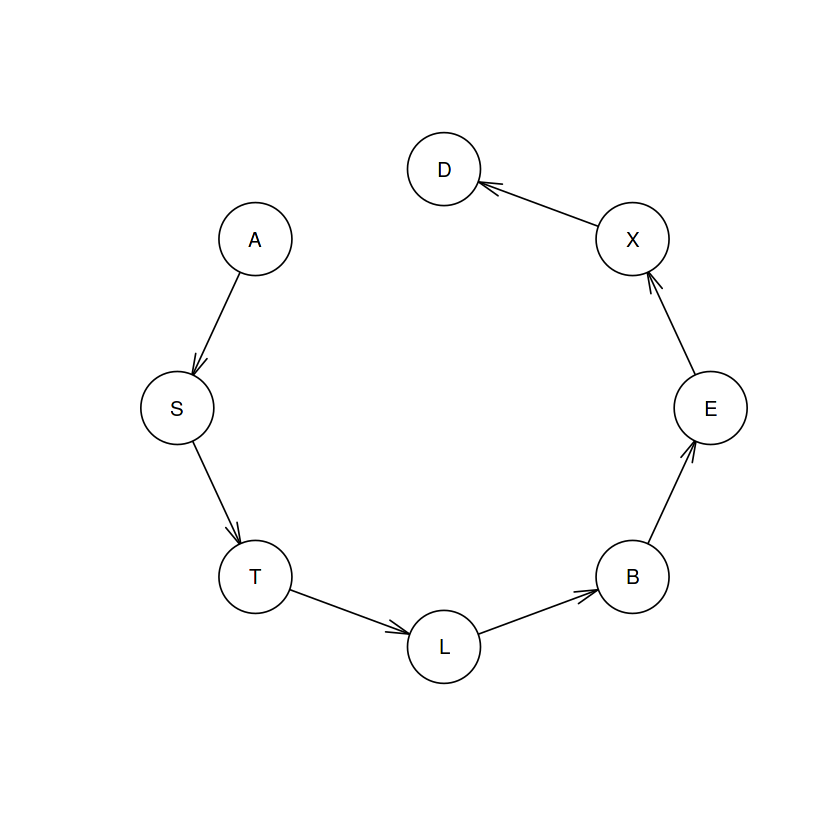

In [59]:
plot(dag_asia)

# Network structure learning

The user creates a network and then codes their confidence in the network and inputs the data. The algorithm then estimates the most likely model structure. Two possible score-based algorithms in bnlearn: Hill Climbing (HC) and Tabu Search (Tabu). By comparison, in constraing-based structure learning, there is no initial model structure provided. There are also hybrid methods.

In [60]:
# E.g. of constraint-based
iambex = iamb(asia)
iambex


  Bayesian network learned via Constraint-based methods

  model:
   [A][S][T][L][X][D][B|S:D][E|T:L] 
  nodes:                                 8 
  arcs:                                  4 
    undirected arcs:                     0 
    directed arcs:                       4 
  average markov blanket size:           1.50 
  average neighbourhood size:            1.00 
  average branching factor:              0.50 

  learning algorithm:                    IAMB 
  conditional independence test:         Mutual Information (disc.) 
  alpha threshold:                       0.05 
  tests used in the learning procedure:  173 


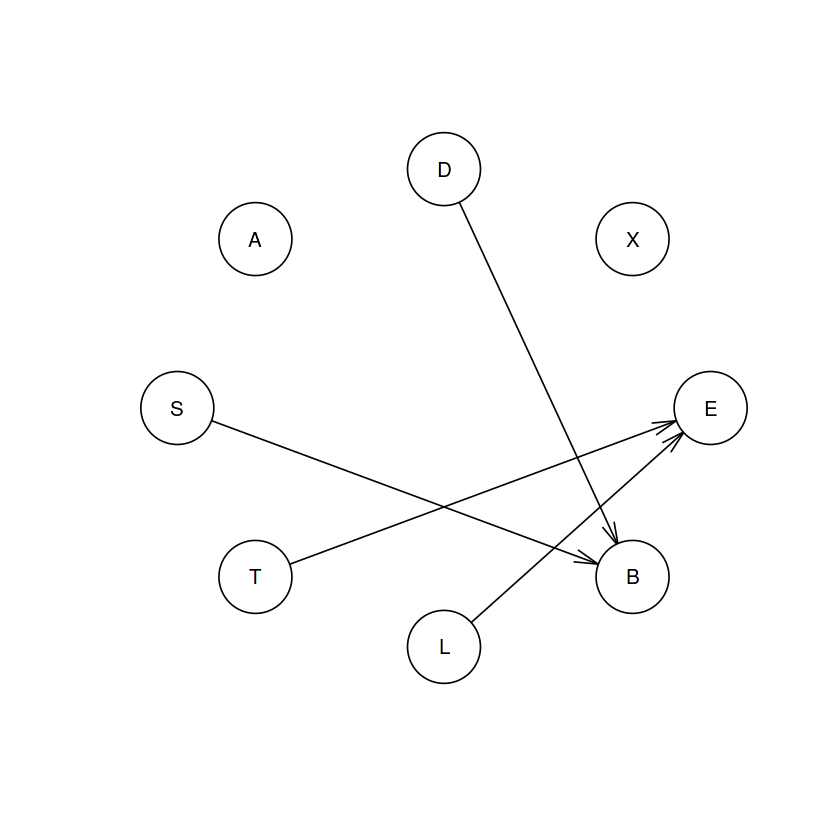

In [61]:
plot(iambex)

In [62]:
# E.g. of a score-based learning using the HC algorithm:
hcex = hc(asia)
hcex


  Bayesian network learned via Score-based methods

  model:
   [A][S][T][L|S][B|S][E|T:L][X|E][D|B:E] 
  nodes:                                 8 
  arcs:                                  7 
    undirected arcs:                     0 
    directed arcs:                       7 
  average markov blanket size:           2.25 
  average neighbourhood size:            1.75 
  average branching factor:              0.88 

  learning algorithm:                    Hill-Climbing 
  score:                                 BIC (disc.) 
  penalization coefficient:              4.258597 
  tests used in the learning procedure:  77 
  optimized:                             TRUE 


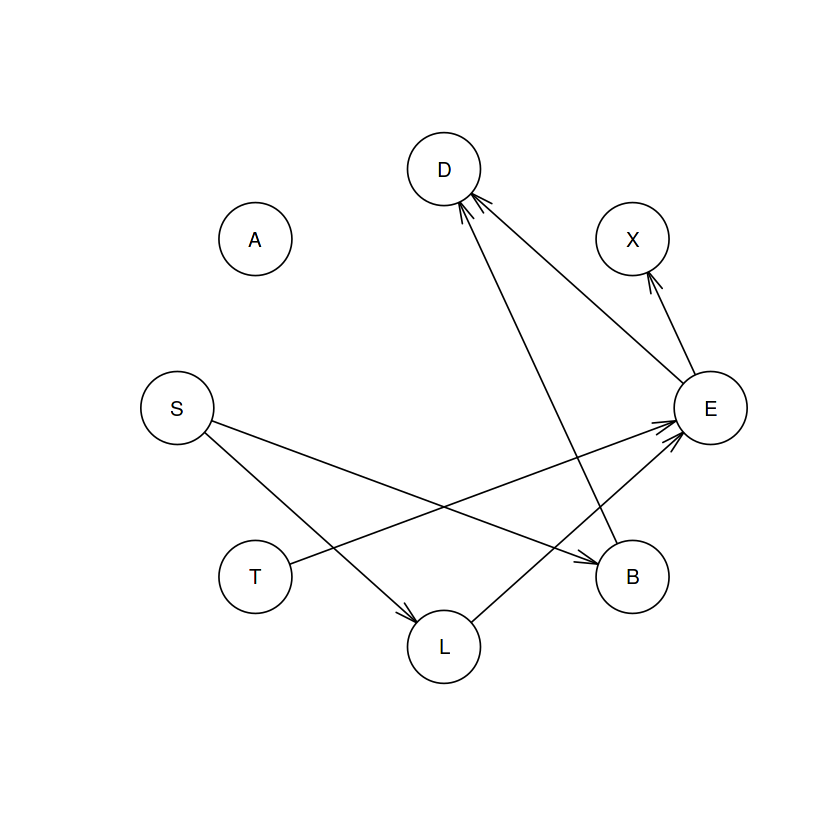

In [63]:
plot(hcex)

In [64]:
# Network scores
score(hcex, asia, type='aic')

[1] -11051.9

In [65]:
# Node 'A' is disconnected. Why? In true model, A influences T. What's the score between these nodes?
eq.net = set.arc(hcex, "A", "T") #Set arcs to get actual scores from individual relationships
eq.net1 = set.arc(hcex, "T", "A")
score(eq.net, asia, type="aic")

[1] -11051.09

# Parameter learning or 'training' the network
Use bn.fit command to generate parameter estimates for CPTs at each node. Default estimation method is maximum likelihood (mle). Can also do parameter estimation with Bayesian methods, but currently only with discrete data (not ordinal, continuous, ...).

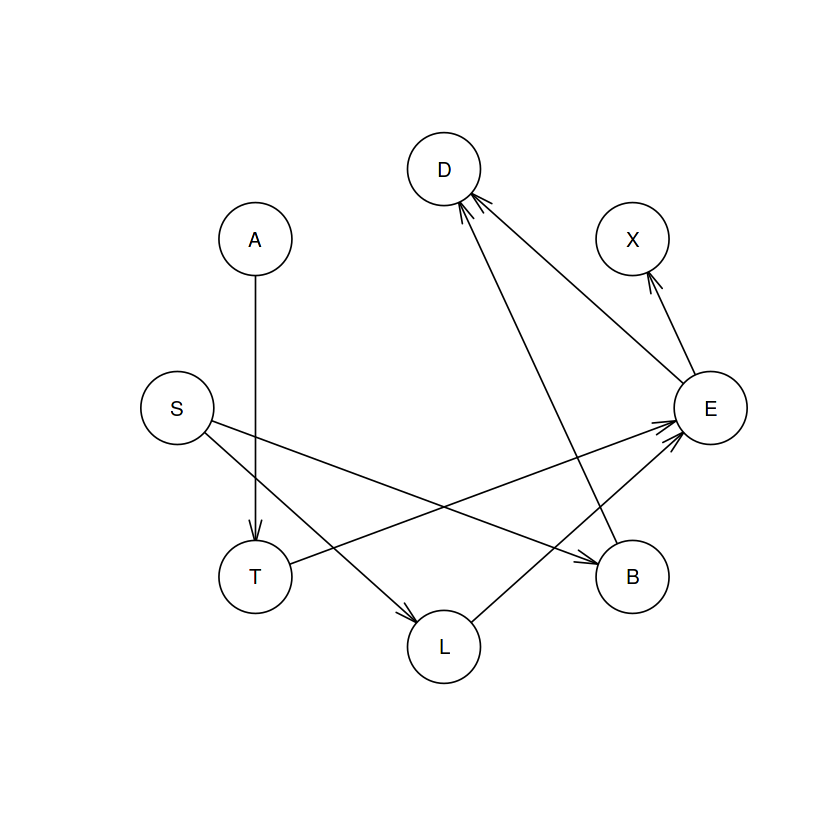

In [66]:
# Start with the hill climbing algorithm results, but add in an arc between A and T
hcex1 = set.arc(hcex, from="A", to="T") # Create a new DAG with the A-T relationship
plot(hcex1)

In [67]:
# Get node parameter estimates (n.b. can only use bayes method with discrete data.
# otherwise have to use default maximum likelihooe estimation, ie just delete method kwarg)
fit = bn.fit(hcex1, asia, method="bayes")
fit


  Bayesian network parameters

  Parameters of node A (multinomial distribution)

Conditional probability table:
        no       yes 
0.9915017 0.0084983 

  Parameters of node S (multinomial distribution)

Conditional probability table:
        no       yes 
0.4970006 0.5029994 

  Parameters of node T (multinomial distribution)

Conditional probability table:
 
     A
T              no         yes
  no  0.991479278 0.947058824
  yes 0.008520722 0.052941176

  Parameters of node L (multinomial distribution)

Conditional probability table:
 
     S
L             no        yes
  no  0.98622008 0.88223017
  yes 0.01377992 0.11776983

  Parameters of node B (multinomial distribution)

Conditional probability table:
 
     S
B            no       yes
  no  0.7005633 0.2823494
  yes 0.2994367 0.7176506

  Parameters of node E (multinomial distribution)

Conditional probability table:
 
, , L = no

     T
E               no          yes
  no  9.999730e-01 3.105590e-03
  yes 2.699638e-05 9.

In [68]:
# Retrieve cpt of a specific node using the $ operator
fit$L


  Parameters of node L (multinomial distribution)

Conditional probability table:
 
     S
L             no        yes
  no  0.98622008 0.88223017
  yes 0.01377992 0.11776983

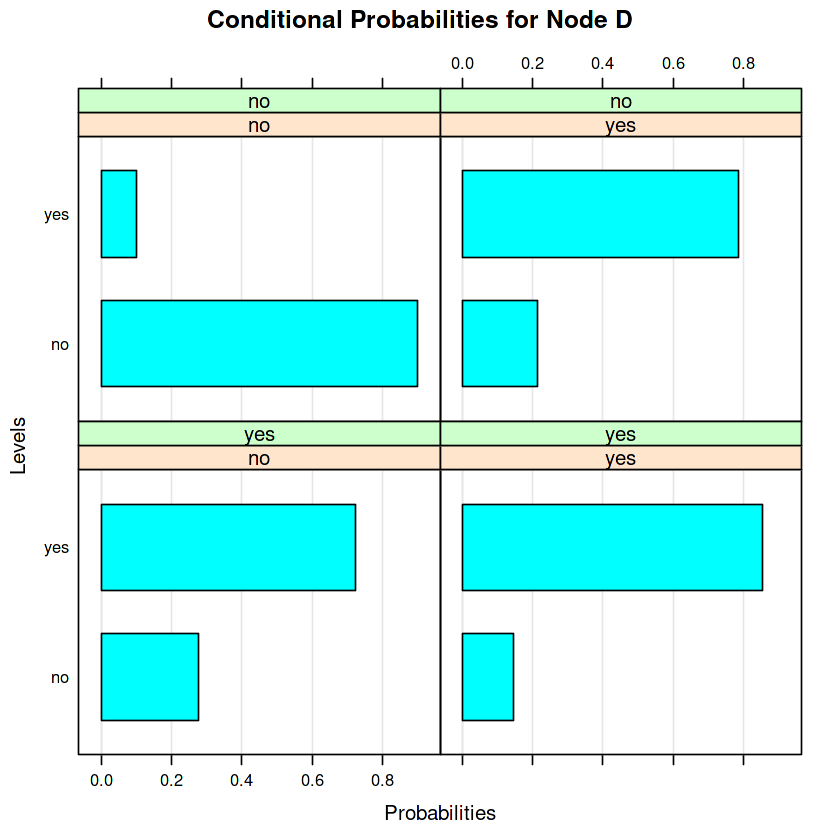

In [69]:
# Visualise the node CPTs with barcharts:
bn.fit.barchart(fit$D)

# Or with a dotplot, bn.fit.dotplot(fit$D)

# Model validation

## Cross validation

This functionality is a huge benefit of using Bnlearn compared to most graphical BBN packages. It means we can get decent statistics on the expected performance of the network e.g. for out-of-sample prediction, and can compare different BN structures to robustly assess whether certain nodes and arcs are worth keeping.

Bnlearn has 3 methods for cross-validation: k-fold (default), custom, hold out. Example of k-fold here.

Lots of different loss functions are available (i.e. different statistics that you can use when doing the cross validation). For predictive performance combined with cross validation, see last part of: http://www.bnlearn.com/examples/xval/. Copied from there.

Cross-validation is also commonly used in classification problems to compute the prediction error of a particular model. We can do that with bn.cv():

## For discrete BBNs:

- loss = "pred" to make frequentist predictions with predict(..., method = "parents"), or
- loss = "pred-lw" to make Bayesian predictions with predict(..., method = "bayes-lw"), and passing the label of the target node to the loss function via the loss.args argument.

The first predicts the target node from its parents; the second from all the available nodes or from a subset of nodes specified in loss.args list as element called using the 'from' argument.

## For continuous Gaussian networks:
"cor-lw" = "Predictive Correlation (Posterior, Gauss.)", used with predict(..., method = "parents")
"cor-lw-cg" = "Predictive Correlation (Posterior, cond. Gauss.)", from predict(..., method = "bayes-lw")
"mse" = "Mean Squared Error", from predict(..., method = "parents")
"mse-lw" = "Mean Squared Error (Posterior, Gauss.)", from predict(..., method = "bayes-lw")
"mse-lw-cg" = "Mean Squared Error (Posterior, cond. Gauss.)"

I looked into CV a lot more in the WATExR project. Some useful notes in those notebooks, and lessons learned.

In [70]:
dag_asia


  Random/Generated Bayesian network

  model:
   [A][S|A][T|S][L|T][B|L][E|B][X|E][D|X] 
  nodes:                                 8 
  arcs:                                  7 
    undirected arcs:                     0 
    directed arcs:                       7 
  average markov blanket size:           1.75 
  average neighbourhood size:            1.75 
  average branching factor:              0.88 

  generation algorithm:                  Empty 


In [82]:
bn.cv(data=asia,  # The data set the BN will be estimated from
      bn = dag_asia,  # Here you can either provide a structure learning algorithm (e.g. "hc" for hill climbing), in which case the structure will be inferred,
                      # Or provide a fixed network structure that you have specified manually (or learned) elsewhere
      method = 'k-fold', # default is k-fold
      k = 3, # Can manually specify the number of folds you want to use.
             # E.g. if this is n-1, it becomes leave-one-out cross validation (useful for small n)
      runs = 20,   # The number of times the cross validation is run
      loss = "pred", # The loss function to use when evaluationg performance of the network
      fit = "bayes", # The fitting method to fit the BN parameters
      loss.args = list(target = 'B') # The node you want to predict.
                                     # Could also include from="...", a list of nodes to take into account when making predictions
#       algorithm.args = '...' # If a structure learning algorithm is used instead of specifying a BN structure, then arguments for it go here
      )


  k-fold cross-validation for Bayesian networks

  target network structure:
   [A][S|A][T|S][L|T][B|L][E|B][X|E][D|X] 
  number of folds:                       3 
  loss function:                         Classification Error 
  training node:                         B 
  number of runs:                        20 
  average loss over the runs:            0.49744 
  standard deviation of the loss:        0.004814277 


## Arc strengths

It is possible to explore the measure of confidence or strength of each arc in a network, while keeping the rest of the network structure fixed. This is really useful!

To do this, use arc.strength(). The function has the argument "criterion", with two options:

- NULL, in which case I think (though am not entirely sure!) that the criterion is a conditional independence test. i.e. the test is to drop the arc from the network. Then the strength returned is a p-value (so the lower the value, the stronger the relationship). Don't quite understand this.

- the label of a score function (e.g. 'aic' for Akaike information criteria), then the strength is measured by the score gain/loss which would be caused by the arc's removal. In other words, it is the difference between the score of the network in which the arc is not present and the score of the network in which the arc is present. Negative values correspond to decreases in the network score and positive values correspond to increases in the network score (the stronger the relationship, the more negative the difference). There may be additional aguments depending on the choice of the score, see different scores for details.

In [83]:
# conditional independence test
strength <- arc.strength(dag_asia, asia,
                        criterion=NULL)
strength

,from,to,strength
,<chr>,<chr>,<dbl>
1,A,S,1.289872e-01
2,S,T,9.681121e-01
3,T,L,5.255075e-01
4,L,B,2.942783e-06
5,B,E,1.403897e-06
6,E,X,0.000000e+00
7,X,D,1.244938e-28


In [85]:
# network score. Possible scores:
# 'loglik' (log likelihood), 'aic', 'bic',...; for continuous:'loglik-g' (log likelihood), 'aic-g', 'bic-g',...

score_criterion = 'bic'
strength <- arc.strength(dag_asia, asia,
                        criterion=score_criterion)
strength

,from,to,strength
,<chr>,<chr>,<dbl>
1,A,S,3.106271
2,S,T,4.257798
3,T,L,4.057061
4,L,B,-6.668157
5,B,E,-7.379065
6,E,X,-928.130833
7,X,D,-57.353946


# Prediction

is the process of calculating a probability distribution over one or more variables whose values we would like to know, given information (evidence) we have about some other variables.

The task of predicting a discrete variable is often referred to as Classification in line with other approaches. For a continuous variable C a prediction will contain both a Mean and a Variance. The task of predicting a continuous variable is often referred to as Regression in line with other approaches.

In bnlearn, the predict() function returns the predicted values for a specified node, given the data specified by "data" and the fitted network. Predicted values can be computed using two methods:

1) **method = "parents"**: the predicted values are computed by plugging in the new values for the parents of "node" in the local probability distribution of node extracted from "fitted".

2) **method = "bayes-lw"**: the predicted values are computed by averaging likelihood weighting simulations performed using all the available nodes as evidence (with the exception of the node whose values we are predicting). The number of random samples which are averaged for each new observation is controlled by the n optional argument; the default is 500. If the variable being predicted is discrete, the predicted level is that with the highest conditional probability. If the variable is continuous, the predicted value is the expected value of the conditional distribution. The variables that are used to compute the predicted values can be specified with the "from" optional argument; the default is to use all the relevant variables from the data. Note that the predicted values will differ in each call to predict() since this method is based on a stochastic simulation.

Things for the future:
- When making predictions with a Bayesian network (or any other approach), it is important to know whether the new data we are making predictions on is consistent with our model. If our model is built on historic data that no longer reflects reality, should we trust the predictions? In order to verify that our Inputs are consistent with our model, we can use Anomaly detection. i.e. Before we make a prediction, we can calculate an anomaly score based on our Inputs. If this score looks normal we can continue to make the prediction. If it looks abnormal then we need to think again.

I haven't added example prediction code to this notebook yet (though it is what I used in all the WATExR work, so see examples there). Here is rough pseudo-code though:

    node = 'I want predictions for this node'

    for (node in nodes_to_predict){
        pred = predict(fitted_BN,
                       data=driving_data,
                       node=node,
                       method='bayes-lw',
                       n=10000
                      )
                          
Find that get the same results when:<br>
1) Predict using all nodes, but evidence data doesn't include columns for any nodes we're trying to predict<br>
2) Predict just using measurable/predictable nodes<br>

# Inference

Once we have structure and parameter estimates, we can make inferences from the network. Inference gives the probability of being in a certain class, or of a predicted value being within a certain range.

To do this, use cpquery function: https://www.bnlearn.com/documentation/man/cpquery.html, which estimates the conditional probability of an event, conditional on some evidence.

There are two sampling methods available for calculating this: logic sampling (the default), and likelihood weighting:

- Logic sampling is a kind of rejection sampling, and requires the 'evidence' to be in the form of a range of values. This is tricky when you have a single measured value you want to set as evidence - the wider the bounds you put on it, the higher the probability that's returned.
- Likelihood weighting: this is slightly more sophisticated. Evidence is provided in a named list for any nodes there is evidence for, either as a single value or as two values. If two values are provided, it samples from within a uniform distribution between the two values. Any node there is no evidence for: if it is a parent node, use the expected value. If it is a child node and there is evidence for some of the parent nodes, then calculate an updated expected value using the evidence, and then use this in the calculation. Have tested this.

From playing around, find lw to produce more reproducible predictions than ls, unless the sample size argument n is set higher than the default.

In [25]:
# E.g. 1, from beginning to end: probability that your xray is yes when you've been to Asia
cpquery(fit, event = (X=='yes'), evidence = (A=='yes'), n=1000000)

[1] 0.1510423

In [28]:
# From end to beginning: probability of you having been to Asia if your xray is yes
# NOTE, this is stochastic - this and cpdist are based on Monte Carlo particle filters (?), so
# can return different outputs when rerun. To make output more similar, increase n from the default

set.seed(1) #As there is a random element, can set this for reproducibility
cpquery(fit, event = (A=="yes"), evidence = ( X=="yes"), n=1000000)

[1] 0.0115026

In [29]:
fit


  Bayesian network parameters

  Parameters of node A (multinomial distribution)

Conditional probability table:
        no       yes 
0.9915017 0.0084983 

  Parameters of node S (multinomial distribution)

Conditional probability table:
        no       yes 
0.4970006 0.5029994 

  Parameters of node T (multinomial distribution)

Conditional probability table:
 
     A
T              no         yes
  no  0.991479278 0.947058824
  yes 0.008520722 0.052941176

  Parameters of node L (multinomial distribution)

Conditional probability table:
 
     S
L             no        yes
  no  0.98622008 0.88223017
  yes 0.01377992 0.11776983

  Parameters of node B (multinomial distribution)

Conditional probability table:
 
     S
B            no       yes
  no  0.7005633 0.2823494
  yes 0.2994367 0.7176506

  Parameters of node E (multinomial distribution)

Conditional probability table:
 
, , L = no

     T
E               no          yes
  no  9.999730e-01 3.105590e-03
  yes 2.699638e-05 9.

# Have a go with continuous data instead of discrete

bnlearn can build BBNs with continuous gaussian nodes.

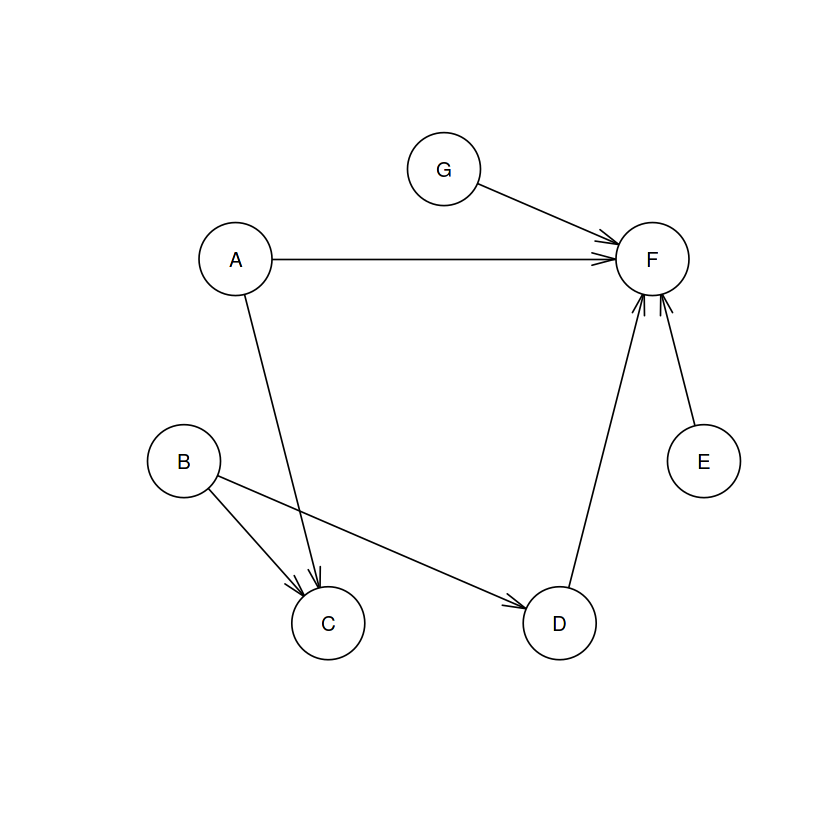

In [30]:
# load a test dataset that comes with bnlearn
data(gaussian.test)
# create and plot the network structure.
dag = model2network("[A][B][E][G][C|A:B][D|B][F|A:D:E:G]")
plot(dag)

In [31]:
# Fit parameters
fit = bn.fit(dag, gaussian.test)
fit


  Bayesian network parameters

  Parameters of node A (Gaussian distribution)

Conditional density: A
Coefficients:
(Intercept)  
   1.007493  
Standard deviation of the residuals: 1.004233 

  Parameters of node B (Gaussian distribution)

Conditional density: B
Coefficients:
(Intercept)  
   2.039499  
Standard deviation of the residuals: 3.034111 

  Parameters of node C (Gaussian distribution)

Conditional density: C | A + B
Coefficients:
(Intercept)            A            B  
   2.001083     1.995901     1.999108  
Standard deviation of the residuals: 0.5089772 

  Parameters of node D (Gaussian distribution)

Conditional density: D | B
Coefficients:
(Intercept)            B  
   5.995036     1.498395  
Standard deviation of the residuals: 0.3286672 

  Parameters of node E (Gaussian distribution)

Conditional density: E
Coefficients:
(Intercept)  
   3.493906  
Standard deviation of the residuals: 1.98986 

  Parameters of node F (Gaussian distribution)

Conditional density: F |

In [32]:
# Nodes A, B, G and E are independent. Can see that their 'coefficient' is the column mean
colMeans(gaussian.test, na.rm = FALSE, dims = 1)

# For child nodes, coefficients are the regression coefficients for the variable against its parents

A         B         C         D         E         F         G 
 1.007493  2.039499  8.089118  9.051011  3.493906 22.122517  5.028076

In [33]:
#The functions coefficients(), fitted() and residuals() allow extraction of the quantities of interest from a single variable or the whole network.
coefficients(fit$F)

(Intercept)            A            D            E            G 
-0.006047321  1.994853041  1.005636909  1.002577002  1.494373265

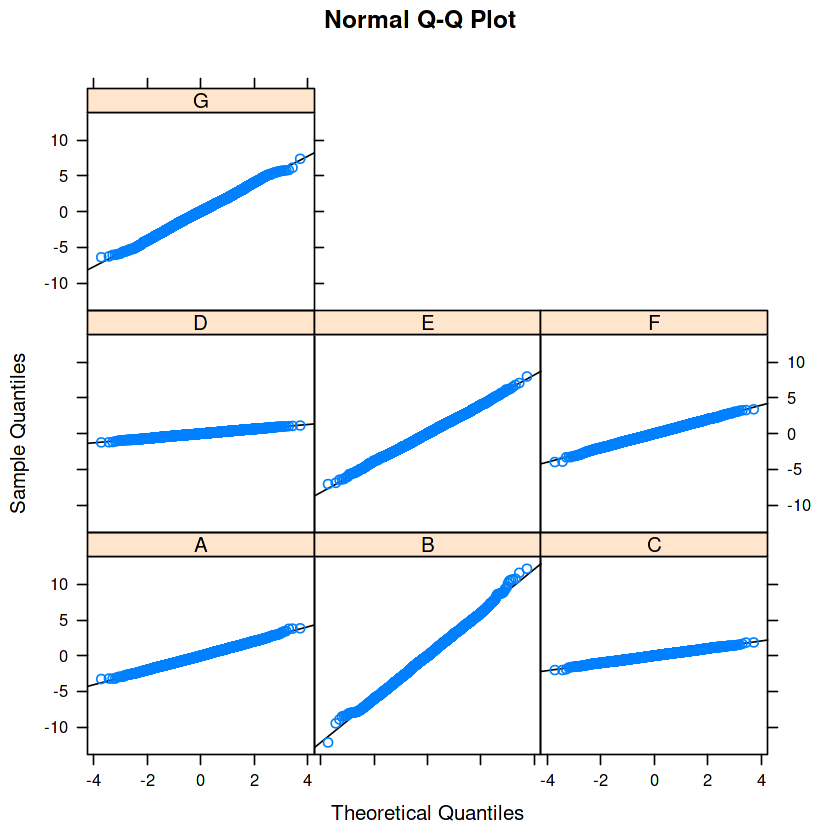

In [34]:
# Functions to plot these quantities: bn.fit.qqplot(), bn.fit.xyplot() and bn.fit.histogram()
# Can do single node plots as in the discrete network case. But can also plot all the nodes in a single plot.
bn.fit.qqplot(fit) # QQ plot of the residuals

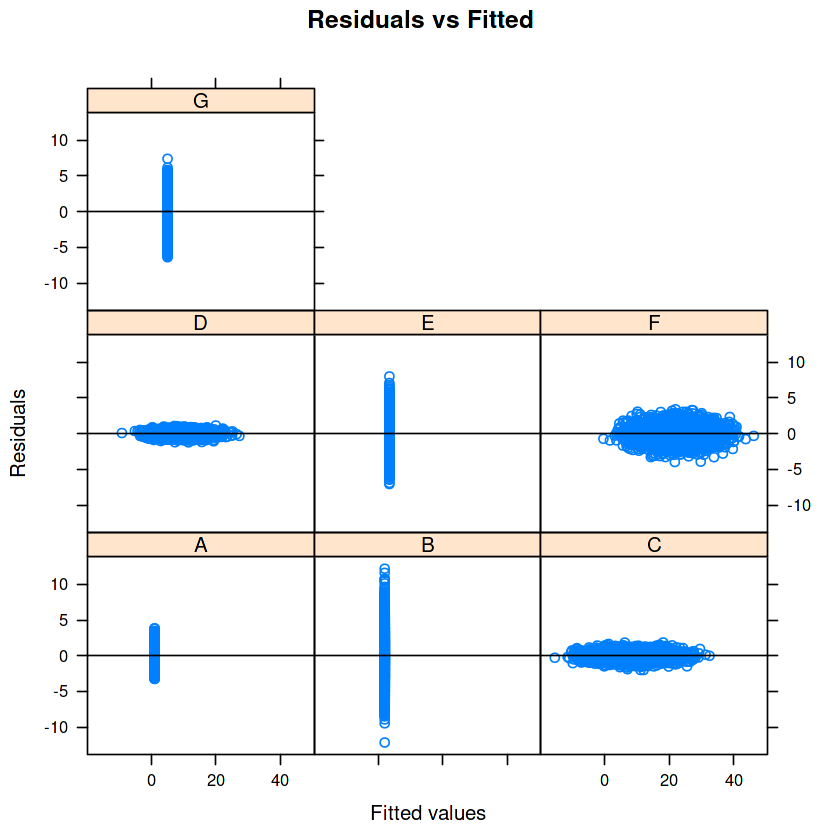

In [35]:
bn.fit.xyplot(fit)

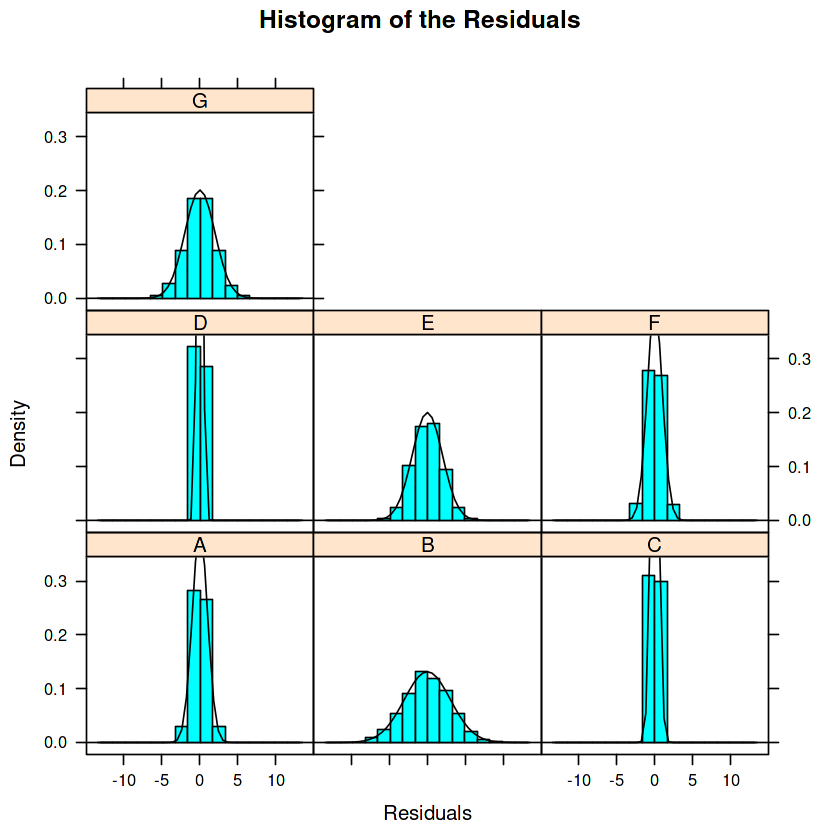

In [36]:
bn.fit.histogram(fit)

# Hybrid networks (mix of continuous and discrete data)

Discrete nodes can only have other discrete nodes as parents. Continuous nodes can have discrete parents. In this case, there's one regression coefficient for each configuration of the states of the discrete parent nodes.

i.e it's a bit limited, and probably not relevant for what I want. However, useful to see what the data looks like


In [37]:
head(clgaussian.test)

,A,B,C,D,E,F,G,H
,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
1,a,b,d,6.460721,11.98657,b,34.84246,2.334846
2,b,a,a,12.758389,30.43674,b,106.63596,2.359112
3,b,c,c,12.175140,17.21532,a,68.92951,2.319435
4,b,c,d,12.006609,14.41646,b,86.17521,2.417494
5,b,a,a,12.328071,30.39631,b,103.58541,2.268150
6,b,c,c,12.613419,15.19344,b,90.84664,2.308369
